https://universe.roboflow.com/brain-tumor-detection-wsera/tumor-detection-ko5jp/dataset/8

In [1]:
!pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.0/871.0 kB 34.5 MB/s eta 0:00:00


# Downloading Data

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("brain-tumor-detection-wsera").project("tumor-detection-ko5jp")
version = project.version(8)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tumor-Detection-8 in yolov11:: 100%|██████████| 3924/3924 [00:00<00:00, 8189.99it/s]


# Training Object Detection model

In [3]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")

# Train the model
train_results = model.train(
    data="/content/Tumor-Detection-8/data.yaml",  # path to dataset YAML
    epochs=20,  # number of training epochs
    imgsz=640,  # training image size
    device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 303MB/s]


Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Tumor-Detection-8/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

100%|██████████| 755k/755k [00:00<00:00, 27.1MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Tumor-Detection-8/train/labels... 1370 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1370/1370 [00:01<00:00, 1013.59it/s]

train: WARNING ⚠️ /content/Tumor-Detection-8/train/images/no_tumor_914_jpg.rf.6714544aee2bde5213fd2c366dff62aa.jpg: 1 duplicate labels removed
train: New cache created: /content/Tumor-Detection-8/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1456, len(boxes) = 1461. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Tumor-Detection-8/valid/labels... 395 images, 0 backgrounds, 0 corrupt: 100%|██████████| 395/395 [00:00<00:00, 879.89it/s]

val: New cache created: /content/Tumor-Detection-8/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.42G     0.9015      3.027      1.277         21        640: 100%|██████████| 86/86 [00:16<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.54it/s]


                   all        395        415      0.959      0.159      0.399      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.39G     0.9106      1.941      1.248         25        640: 100%|██████████| 86/86 [00:13<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.21it/s]

                   all        395        415      0.808       0.45      0.459      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.39G     0.9208      1.684      1.267         15        640: 100%|██████████| 86/86 [00:13<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.52it/s]

                   all        395        415      0.545      0.365      0.369       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.39G     0.9679      1.508      1.291         19        640: 100%|██████████| 86/86 [00:13<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.89it/s]

                   all        395        415      0.659      0.441      0.472      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.39G     0.8766      1.273      1.251         19        640: 100%|██████████| 86/86 [00:13<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.80it/s]

                   all        395        415      0.736      0.497      0.551      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.39G     0.8766       1.18      1.252         20        640: 100%|██████████| 86/86 [00:13<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.69it/s]

                   all        395        415      0.731      0.598      0.599      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.39G     0.8821       1.11      1.252         13        640: 100%|██████████| 86/86 [00:13<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.66it/s]

                   all        395        415      0.786      0.515      0.556      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.39G     0.8253      1.044      1.201         19        640: 100%|██████████| 86/86 [00:13<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.84it/s]

                   all        395        415      0.575      0.545      0.576      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.38G     0.7848     0.9258      1.175         15        640: 100%|██████████| 86/86 [00:13<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.97it/s]

                   all        395        415      0.745      0.609      0.618      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.39G     0.7447     0.8947      1.155         19        640: 100%|██████████| 86/86 [00:13<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.88it/s]

                   all        395        415       0.82      0.542      0.581      0.458


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.38G     0.7074     0.9497      1.138         10        640: 100%|██████████| 86/86 [00:13<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.86it/s]

                   all        395        415      0.797      0.579      0.614      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.39G     0.6813     0.8432      1.133         11        640: 100%|██████████| 86/86 [00:13<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.94it/s]

                   all        395        415      0.849      0.599      0.645      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.39G     0.6572     0.7815      1.104         10        640: 100%|██████████| 86/86 [00:13<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.98it/s]

                   all        395        415      0.833      0.612      0.639      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.39G     0.6458     0.7373      1.093         11        640: 100%|██████████| 86/86 [00:13<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.72it/s]

                   all        395        415      0.852      0.612      0.638      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.39G     0.6228     0.7037      1.079         11        640: 100%|██████████| 86/86 [00:13<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.75it/s]

                   all        395        415      0.774      0.644      0.643      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.39G     0.5996     0.6529      1.075         10        640: 100%|██████████| 86/86 [00:13<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.84it/s]

                   all        395        415      0.887      0.617      0.664      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.39G     0.5729     0.6423      1.056         12        640: 100%|██████████| 86/86 [00:13<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.88it/s]

                   all        395        415      0.826      0.645      0.658       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.39G     0.5636      0.606      1.042         11        640: 100%|██████████| 86/86 [00:13<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.95it/s]

                   all        395        415      0.863      0.636      0.669      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.38G     0.5307     0.5677      1.022         10        640: 100%|██████████| 86/86 [00:13<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.95it/s]

                   all        395        415      0.899      0.616      0.667      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.39G     0.5142     0.5423      1.013         10        640: 100%|██████████| 86/86 [00:13<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.03it/s]

                   all        395        415      0.899      0.634      0.674      0.549



20 epochs completed in 0.093 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.49it/s]


                   all        395        415      0.897      0.633      0.674      0.549
              NO_tumor        115        116      0.916      0.966      0.964      0.803
                glioma         30         36      0.874      0.579      0.673      0.469
            meningioma        144        148      0.937      0.892      0.937      0.828
             pituitary        106        111       0.76       0.73      0.793      0.642
space-occupying lesion-          1          4          1          0    0.00189     0.0017
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train


# Inference

In [4]:
from IPython.display import Image

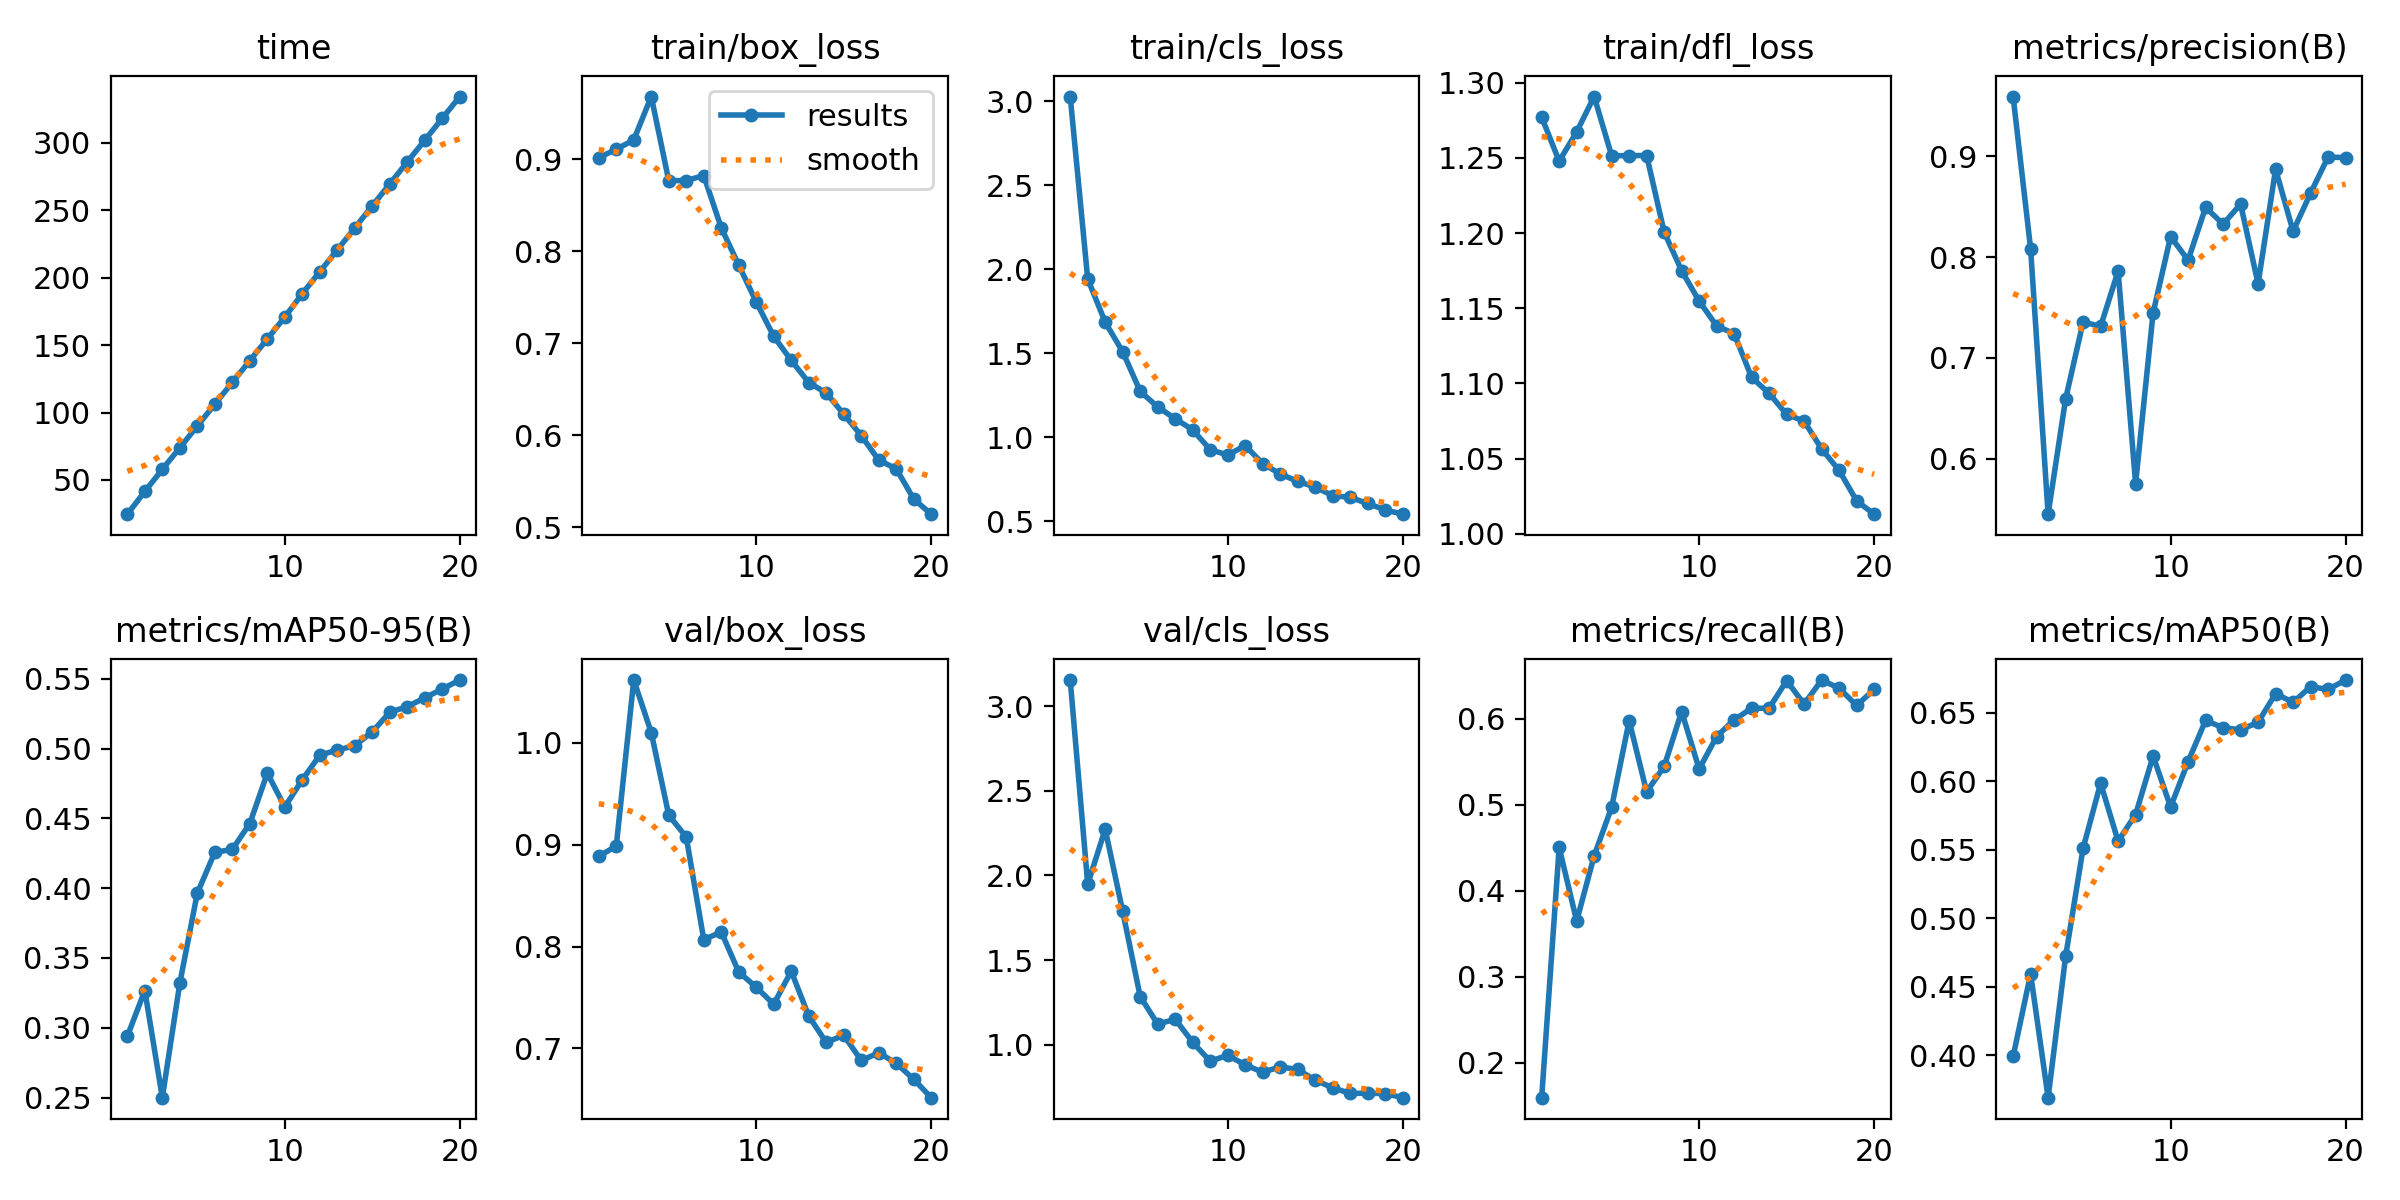

In [5]:

Image("/content/runs/detect/train/results.png", width=600)


image 1/1 /content/meningioma_3.jpg: 640x640 1 meningioma, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


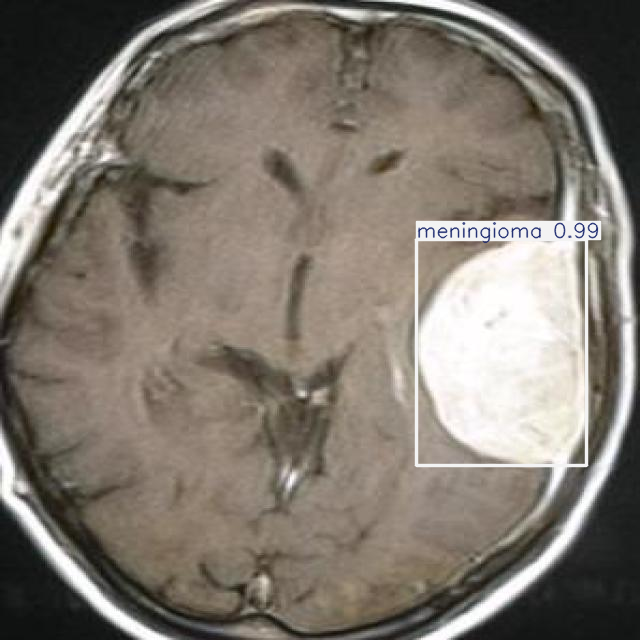

In [6]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Perform object detection on an image
results = model("/content/meningioma_3.jpg", save=True)
results[0].show()


In [7]:
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    print(boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2.], device='cuda:0')
conf: tensor([0.9882], device='cuda:0')
data: tensor([[416.9917, 239.6776, 586.1624, 465.3161,   0.9882,   2.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[501.5770, 352.4968, 169.1707, 225.6385]], device='cuda:0')
xywhn: tensor([[0.7837, 0.5508, 0.2643, 0.3526]], device='cuda:0')
xyxy: tensor([[416.9917, 239.6776, 586.1624, 465.3161]], device='cuda:0')
xyxyn: tensor([[0.6515, 0.3745, 0.9159, 0.7271]], device='cuda:0')


In [8]:
from ultralytics import YOLO
from ultralytics import SAM

# Load the YOLO model
yolo_model = YOLO("/content/runs/detect/train/weights/best.pt")  # pretrained YOLO model

# Run batched inference on a list of images
results = yolo_model("/content/meningioma_3.jpg")  # return a list of Results objects

# Load the SAM model
sam_model = SAM("sam2_b.pt")

for result in results:
     class_ids = result.boxes.cls.int().tolist()  # noqa
     if len(class_ids):
         boxes = result.boxes.xyxy  # Boxes object for bbox outputs
         sam_results = sam_model(result.orig_img, bboxes=boxes, verbose=False, save=True, device=0)


image 1/1 /content/meningioma_3.jpg: 640x640 1 meningioma, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 154M/154M [00:04<00:00, 37.5MB/s]


Results saved to runs/segment/predict
